# Gene distance plots exploratory data analysis notebook

## What are the gene distance plots?

An attempt to investigate if the precision and recall of variant callers is affected by the distance between samples and references. However here we focus on regions that are common between the samples and the refs, thus we do not address the issues of reference incompleteness (i.e. we don't analyse regions that exclusive to the sample or the ref).

## How do we do this?

We first identify genes that are common between a pair `(sample, ref)`. For `snippy`, `ref` is each 226 references we use. For pandora, `ref` is simply the `pandora_multisample.vcf_ref.fa`. To identify these genes, we need a gene sequence that is as close as possible to the samples/refs. Thus we use the gene sequences in the `pandora_multisample.vcf_ref.fa`. We map the genes in `pandora_multisample.vcf_ref.fa` for each pair `(sample, ref)`, allowing us to know if the gene appears in the sample and its coordinates, in the ref and its coordinates, and the edit distance between them (in case they appear in both sample and ref).

Using the gene coordinates, we can infer how many variant calls lie on each identified gene, and if they are correct or incorrect (using the 4-way pipeline assessment), allowing us to know the precision ratio of the caller in that gene. The same for recall - we know how many truth variants lie on the gene, and how many the caller discovered. We plot these values by bins of genes split by its edit distance between the sample and the refs.

All of this is comprised in a snakemake pipeline, and this EDA notebook analyse the pipeline's output to check what is the best way to convey this data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from pathlib import Path
import plotly.express as px

# Main configs

In [2]:
data_path = Path("/home/leandro/git/snippy_calls_gene_distance/notebooks/eda_data/hps/nobackup/research/zi/leandro/snippy_calls_gene_distance/")
tools = ["pandora", "snippy"]
colors = ["red", "blue"]

plt.rcParams['figure.dpi'] = 600
sns.set()

# Data input

For each triple `(gene, truth, reference)`, we know the nb of truth variants in that gene (`max_recall`), the nb of truth variants the tool was able to call (`observed_recall`) and thus the recall performance (`recall_ratio = observed_recall / max_recall`). We also know the edit distance of the gene between the ref and the truth (`distance`).

We also have the same stuff for precision.

In [3]:
df_pandora_precision = pd.read_csv(data_path / "evaluating_calls_output_pandora_no_denovo_100x/get_gene_truth_ref_precision_proportion_distance/all_gene_truth_ref_precision_proportion_distance.csv")
df_pandora_precision["tool"] = "pandora"
df_snippy_precision = pd.read_csv(data_path / "evaluating_calls_output_snippy/get_gene_truth_ref_precision_proportion_distance/all_gene_truth_ref_precision_proportion_distance.csv")
df_snippy_precision["tool"] = "snippy"
df_precision = pd.concat([df_pandora_precision, df_snippy_precision], ignore_index = True)
display(df_precision)

df_pandora_recall = pd.read_csv(data_path / "evaluating_calls_output_pandora_no_denovo_100x/get_gene_truth_ref_recall_proportion_distance/all_gene_truth_ref_recall_proportion_distance.csv")
df_pandora_recall["tool"] = "pandora"
df_snippy_recall = pd.read_csv(data_path / "evaluating_calls_output_snippy/get_gene_truth_ref_recall_proportion_distance/all_gene_truth_ref_recall_proportion_distance.csv")
df_snippy_recall["tool"] = "snippy"
df_recall = pd.concat([df_pandora_recall, df_snippy_recall], ignore_index = True)
display(df_recall)

gene     truth                        ref  distance  \
0           Cluster_0    CFT073  pandora_vcf_ref_no_denovo  0.000000   
1          Cluster_10    CFT073  pandora_vcf_ref_no_denovo  0.002004   
2        Cluster_1001    CFT073  pandora_vcf_ref_no_denovo  0.065375   
3        Cluster_1007    CFT073  pandora_vcf_ref_no_denovo  0.000000   
4        Cluster_1009    CFT073  pandora_vcf_ref_no_denovo  0.002433   
...               ...       ...                        ...       ...   
4244218    GC00010497  063_STEC                 CP010140.1  0.026144   
4244219    GC00010606  063_STEC                 CP010140.1  0.067633   
4244220    GC00010787  063_STEC                 CP010140.1  0.020080   
4244221    GC00010870  063_STEC                 CP010140.1  0.015152   
4244222    GC00011088  063_STEC                 CP010140.1  0.043478   

         max_precision  observed_precision  precision_ratio     tool  
0                  8.0            8.000000         1.000000  pandora  
1                  3.0            3.000000         1.000000  pandora  
2                 10.0            9.961538         0.996154  pandora  
3                  1.0            1.000000         1.000000  pandora  
4                 15.0           15.000000         1.000000  pandora  
...                ...                 ...              ...      ...  
4244218            8.0            8.000000         1.000000   snippy  
4244219            4.0            4.000000         1.000000   snippy  
4244220            4.0            4.000000         1.000000   snippy  
4244221            2.0            2.000000         1.000000   snippy  
4244222            6.0            6.000000         1.000000   snippy  

[4244223 rows x 8 columns]

gene     truth                        ref  distance  \
0          Cluster_1009    CFT073  pandora_vcf_ref_no_denovo  0.002433   
1         Cluster_10094    CFT073  pandora_vcf_ref_no_denovo  0.098901   
2          Cluster_1011    CFT073  pandora_vcf_ref_no_denovo  0.012755   
3           Cluster_102    CFT073  pandora_vcf_ref_no_denovo  0.045767   
4         Cluster_10205    CFT073  pandora_vcf_ref_no_denovo  0.011236   
...                 ...       ...                        ...       ...   
12426193     GC00010496  063_STEC                 CP010140.1  0.030864   
12426194     GC00010497  063_STEC                 CP010140.1  0.026144   
12426195     GC00010787  063_STEC                 CP010140.1  0.020080   
12426196     GC00010870  063_STEC                 CP010140.1  0.015152   
12426197     GC00011088  063_STEC                 CP010140.1  0.043478   

          max_recall  observed_recall  recall_ratio     tool  
0                7.0              6.0      0.857143  pandora  
1                5.0              3.0      0.600000  pandora  
2                3.0              3.0      1.000000  pandora  
3                5.0              3.0      0.600000  pandora  
4                1.0              0.0      0.000000  pandora  
...              ...              ...           ...      ...  
12426193        12.0              8.0      0.666667   snippy  
12426194         9.0              6.0      0.666667   snippy  
12426195         5.0              5.0      1.000000   snippy  
12426196         3.0              3.0      1.000000   snippy  
12426197         7.0              7.0      1.000000   snippy  

[12426198 rows x 8 columns]

# Main helper functions (please skip, go direct to the Results)

In [4]:
from matplotlib.lines import Line2D

def get_bounds(step, max_bin):
    bounds = [0.0]
    current_step = step
    while current_step <= max_bin:
        bounds.append(current_step)
        current_step += step
    assert len(bounds) > 0
    return bounds

def get_edit_distances(row, bounds):
    distance = row["distance"]
    for upper_bound in bounds[1:]:
        if distance < upper_bound:
            return upper_bound
    return bounds[-1]

def round_ed_label_and_return_str(row):
    return "%.2f"%round(row["edit_distance_labels"], 2)

def get_df_with_edit_distance_labels (df, max_precision_or_recall_column, having_at_least_n_variants, step, max_bin):
    df = df.query(f"{max_precision_or_recall_column} >= @having_at_least_n_variants")
    bounds = get_bounds(step, max_bin)
    edit_distance_labels = df.apply(get_edit_distances, axis=1, bounds=bounds)
    df["edit_distance_labels"] = edit_distance_labels
    df["edit_distance_labels_as_str"] = df.apply(round_ed_label_and_return_str, axis=1)
    return df

def get_df_with_edit_distance_labels_for_precision (df, step, max_bin):
    return get_df_with_edit_distance_labels(df, max_precision_or_recall_column="max_precision",
                                     having_at_least_n_variants=1, step=step, max_bin=max_bin)

def get_df_with_edit_distance_labels_for_recall (df, step, max_bin):
    return get_df_with_edit_distance_labels(df, max_precision_or_recall_column="max_recall",
                                     having_at_least_n_variants=1, step=step, max_bin=max_bin)

def init_plot(figsize=(20, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    return fig, ax

def save_figure(fig, output_filepath):
    fig.savefig(output_filepath, format="png", dpi=600)
    
def plot_lineplot_count_in_datapoints_in_several_bins(count_df, step, display_plot=False, display_dfs=False, output_filepath=None):
    fig, ax = init_plot()
    ax.set_xlabel(f"Edit distance (gene bins at each {step * 100}%)")
    ax.set_xlim([0.0, 0.2])
    ax.set_ylabel("Number of datapoints (gene, truth, ref) per bin")
    lineplot = sns.lineplot(x="edit_distance_labels", y="nb_of_datapoints", data=count_df, hue="tool",
                            palette=colors)
    lineplot.set_yscale("log")
    
    if output_filepath is not None:
        save_figure(fig, output_filepath)
        
    if display_plot:
        ax.plot()
    
    if display_dfs:
        display_full(count_df.query("tool == 'pandora'"))
        display_full(count_df.query("tool == 'snippy'"))

def get_edit_distance_threshold_where_all_tools_have_at_least_the_min_nb_of_datapoints(count_df, min_nb_of_datapoints, nb_of_tools):
    edit_distance_and_nb_of_tools = count_df.query("nb_of_datapoints >= @min_nb_of_datapoints").groupby("edit_distance_labels").count()
    del edit_distance_and_nb_of_tools["nb_of_datapoints"]
    edit_distance_threshold_to_use = max(edit_distance_and_nb_of_tools.query("tool == @nb_of_tools").index)
    return edit_distance_threshold_to_use

def plot_violin_box_and_line_plots_to_axes(df, tool, color, ax):
    df = df.query("tool == @tool")
    
    sns.violinplot(x="edit_distance_labels_as_str", y="recall_ratio", data=df,
                   scale="count", cut=0, color=color, width=0.9/2, inner=None, linewidth=1.0,
                   ax=ax)
    sns.boxplot(x="edit_distance_labels_as_str", y="recall_ratio", data=df,
                 color=color, width=0.02, linewidth=0.3, showfliers=False, ax=ax)
    sns.lineplot(x="edit_distance_labels_as_str", y="recall_ratio", data=df,
                 estimator=np.median, color=color, linewidth=1.0, ci=None, ax=ax)
    sns.lineplot(x="edit_distance_labels_as_str", y="recall_ratio", data=df,
                 estimator=np.mean, color=color, linewidth=1.0, ci=None, ax=ax)
    ax.lines[-1].set_linestyle(":")
    plt.setp(ax.collections, alpha=.3)
    ax.set_ylim([-0.05, 1.05])



def plot_violin_and_line_for_recall_in_genes_in_several_bins(df, step, edit_distance_threshold, display_plot=False, output_filepath=None):
    fig, ax = init_plot((40, 3))
    df_with_edit_distance_threshold = df.query("edit_distance_labels <= @edit_distance_threshold")
    sorted_ed_labels = sorted(df_with_edit_distance_threshold["edit_distance_labels_as_str"].unique())
    
    
    plot_violin_box_and_line_plots_to_axes(df_with_edit_distance_threshold, tools[0], colors[0], ax)
    for tool, color in zip(tools[1:], colors[1:]):
        ax_bbox = ax.get_position()
        ax_2_bbox = ax_bbox
        x_shift = (ax_bbox.x1-ax_bbox.x0)/len(sorted_ed_labels)/2
        ax_2_bbox.x0 += x_shift
        ax_2_bbox.x1 += x_shift
        ax_2 = fig.add_axes(ax_2_bbox, frameon=False)
        plot_violin_box_and_line_plots_to_axes(df_with_edit_distance_threshold, tool, color, ax_2)
        ax_2.get_xaxis().set_visible(False)
        ax_2.get_yaxis().set_visible(False)
    

    ax.set(xlabel=f"Edit distance (gene bins at each {step*100}%)", ylabel='Recall ratio per bin')    
    ax.xaxis.set(ticks=np.arange(1/len(sorted_ed_labels)/2+ax_bbox.x0, len(sorted_ed_labels)+ax_bbox.x0), ticklabels=sorted_ed_labels)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
    ax.xaxis.label.set_fontsize(30) 
    ax.yaxis.label.set_fontsize(26) 
    
    legend_elements = [Line2D([0], [0], color=color, lw=4, label=tool)
                       for tool, color in zip(tools, colors)]
    ax.legend(handles=legend_elements, loc="lower left")
   
    if output_filepath is not None:
        save_figure(fig, output_filepath)
        
    if display_plot:
        plt.show()


def plot_line_for_precision_in_genes_in_several_bins(df, step, edit_distance_threshold, display_plot=False, output_filepath=None):
    fig, ax = init_plot((10, 3))
    df_with_edit_distance_threshold = df.query("edit_distance_labels <= @edit_distance_threshold")
    
    sns.lineplot(x="edit_distance_labels", y="precision_ratio", data=df_with_edit_distance_threshold, hue="tool",
                 estimator=np.median, linewidth=1.0, ci=None, palette=colors, ax=ax)
    ax_2 = fig.add_axes(ax.get_position(), frameon=False)
    sns.lineplot(x="edit_distance_labels", y="precision_ratio", data=df_with_edit_distance_threshold, hue="tool",
                 estimator=np.mean, linewidth=1.0, ci=None, ax=ax_2, palette=colors, legend=False)
    ax_2.lines[0].set_linestyle(":")
    ax_2.lines[1].set_linestyle(":")
    ax_2.get_xaxis().set_visible(False)
    ax_2.get_yaxis().set_visible(False)

    ax.set(xlabel=f"Edit distance (gene bins at each {step*100}%)", ylabel='Recall ratio per bin')    
       
    if output_filepath is not None:
        save_figure(fig, output_filepath)
        
    if display_plot:
        plt.show()


# Cached dfs for easier processing (please skip, go direct to the Results)

In [5]:
def get_count_df(df):
    count_df = df.groupby(by=["edit_distance_labels", "tool"], as_index=False).count()
    count_df = count_df[["edit_distance_labels", "tool", "gene"]]
    count_df.columns = ["edit_distance_labels", "tool", "nb_of_datapoints"]
    return count_df


df_precision_with_step_001 = get_df_with_edit_distance_labels_for_precision(df_precision, step = 0.01, max_bin = 0.2)
count_df_precision_with_step_001 = get_count_df(df_precision_with_step_001)
df_recall_with_step_001 = get_df_with_edit_distance_labels_for_recall(df_recall, step = 0.01, max_bin = 0.2)
count_df_recall_with_step_001 = get_count_df(df_recall_with_step_001)

# Results

# Recall

## Recall with 1% bins (show only until all tools have >= 50 datapoints; 1 datapoint = (gene, pair of truths, ref)):

In [6]:
edit_distance_threshold_for_recall_where_all_tools_have_at_least_50_datapoints = \
    get_edit_distance_threshold_where_all_tools_have_at_least_the_min_nb_of_datapoints(
        count_df_recall_with_step_001,
        min_nb_of_datapoints = 50,
        nb_of_tools = 2)

**The following plot has:**
* **violins normalized by counts per tool;**
* **boxplots included (zoom in to see them);**
* **line plots going through the median (solid) and mean (dotted);**

**To view it better, open the image in a new tab/window (many details, we have to make it wide to look well at them)**

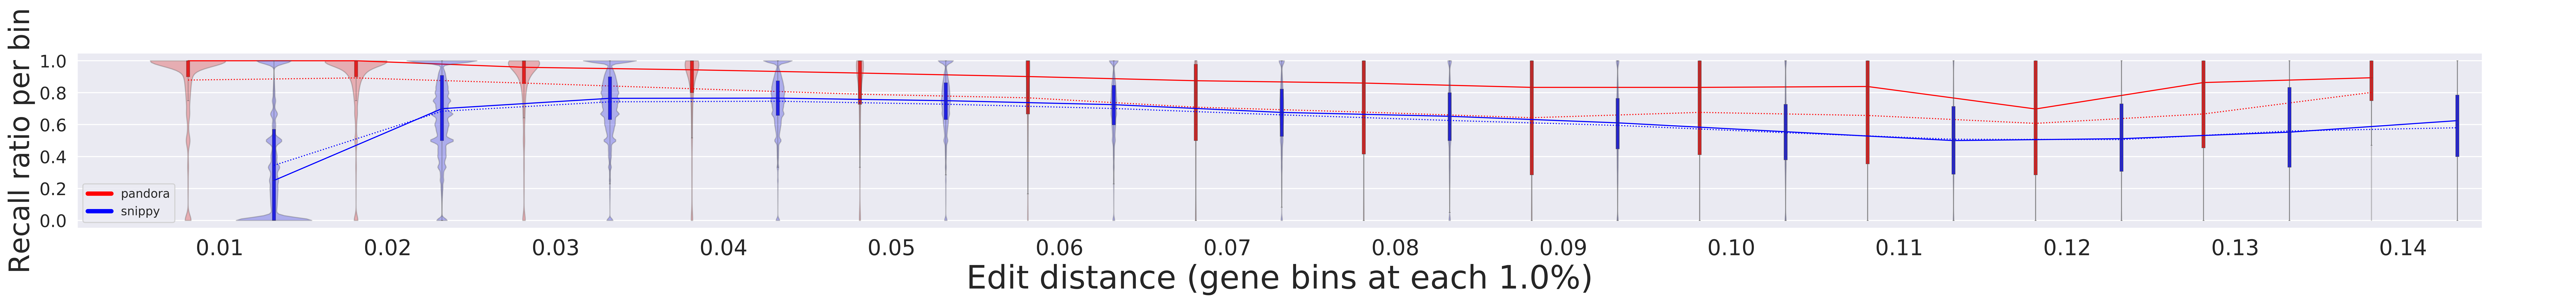

In [7]:
plot_violin_and_line_for_recall_in_genes_in_several_bins(
    df_recall_with_step_001, step=0.01, 
    edit_distance_threshold = edit_distance_threshold_for_recall_where_all_tools_have_at_least_50_datapoints,
    display_plot=True)

## Number of datapoints (1 datapoint = (gene, pair of truths, ref)) in each bin (log scale)

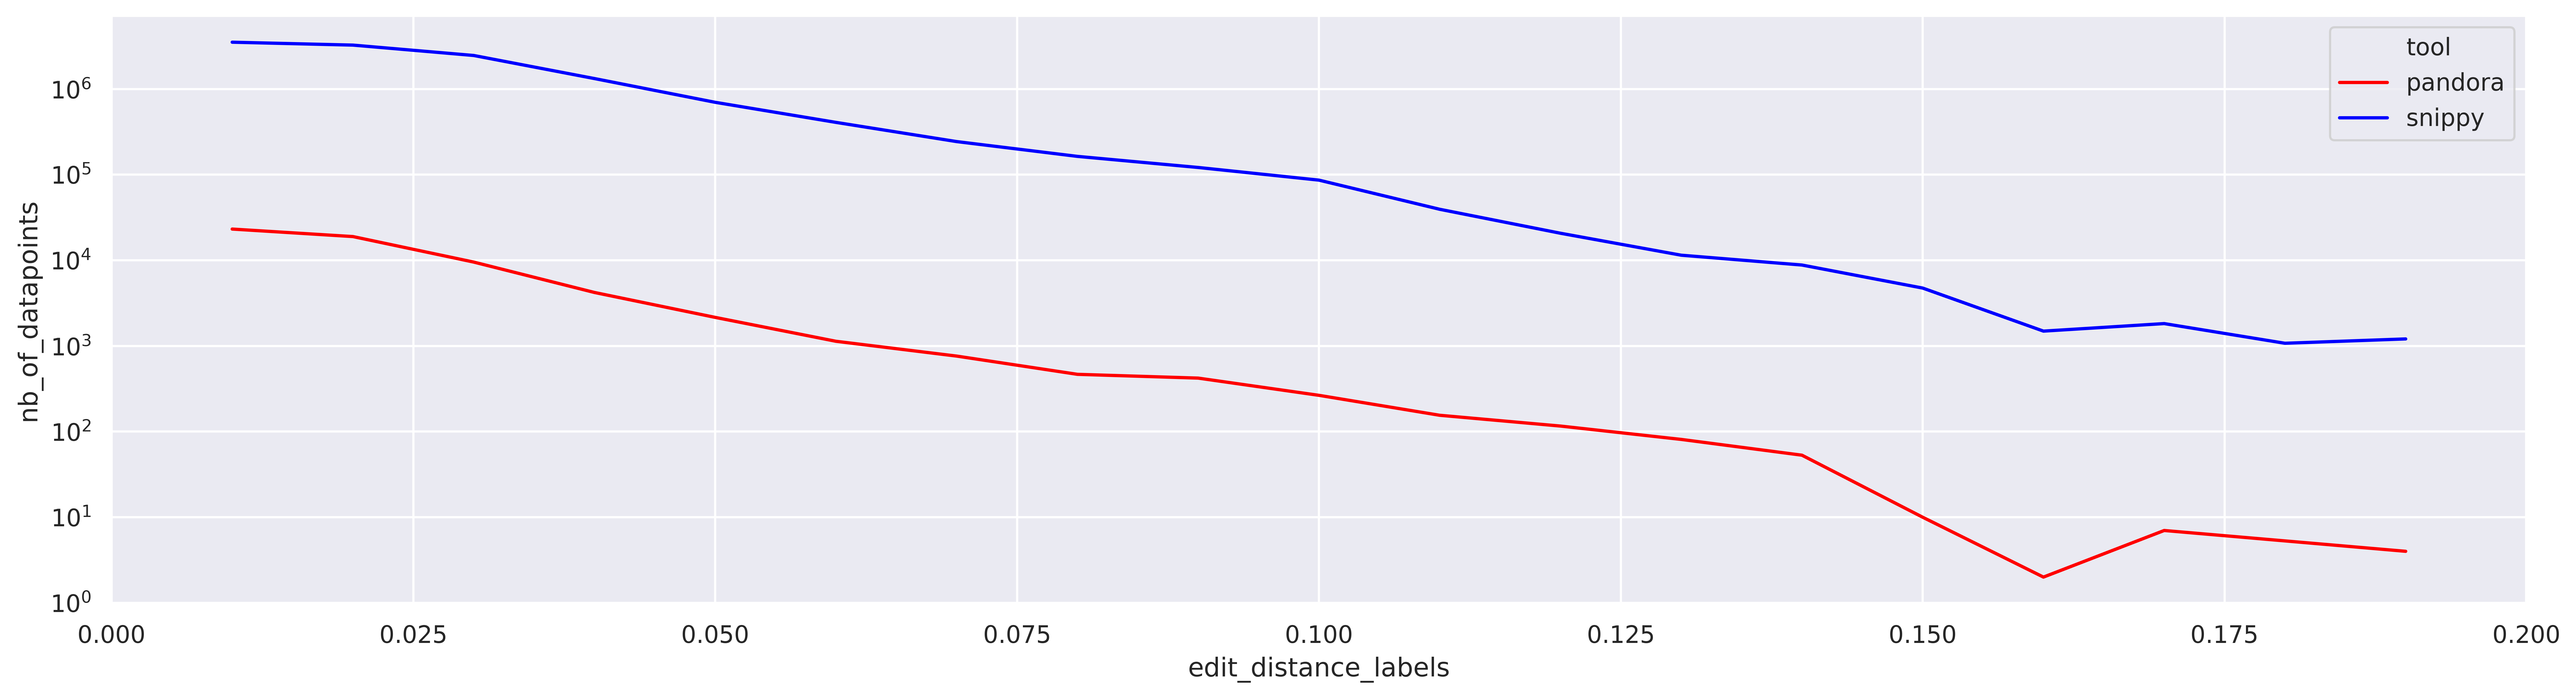

In [8]:
plot_lineplot_count_in_datapoints_in_several_bins(count_df_recall_with_step_001, step=0.01, display_plot=True)

# Precision

## Precision with 1% bins (show only until all tools have >= 50 datapoints; 1 datapoint = (gene, truth, ref)):

In [9]:
edit_distance_threshold_for_precision_where_all_tools_have_at_least_50_datapoints = \
    get_edit_distance_threshold_where_all_tools_have_at_least_the_min_nb_of_datapoints(
        count_df_precision_with_step_001,
        min_nb_of_datapoints = 50,
        nb_of_tools = 2)

**OBS: violin and box plots are not shown here because all datapoints are so close to 1.0 that the violin/boxplots produced were even bugged (this was the case when the limits of the y-axis were [0, 1]. Can retry now if you want to see these plots also for precision.**

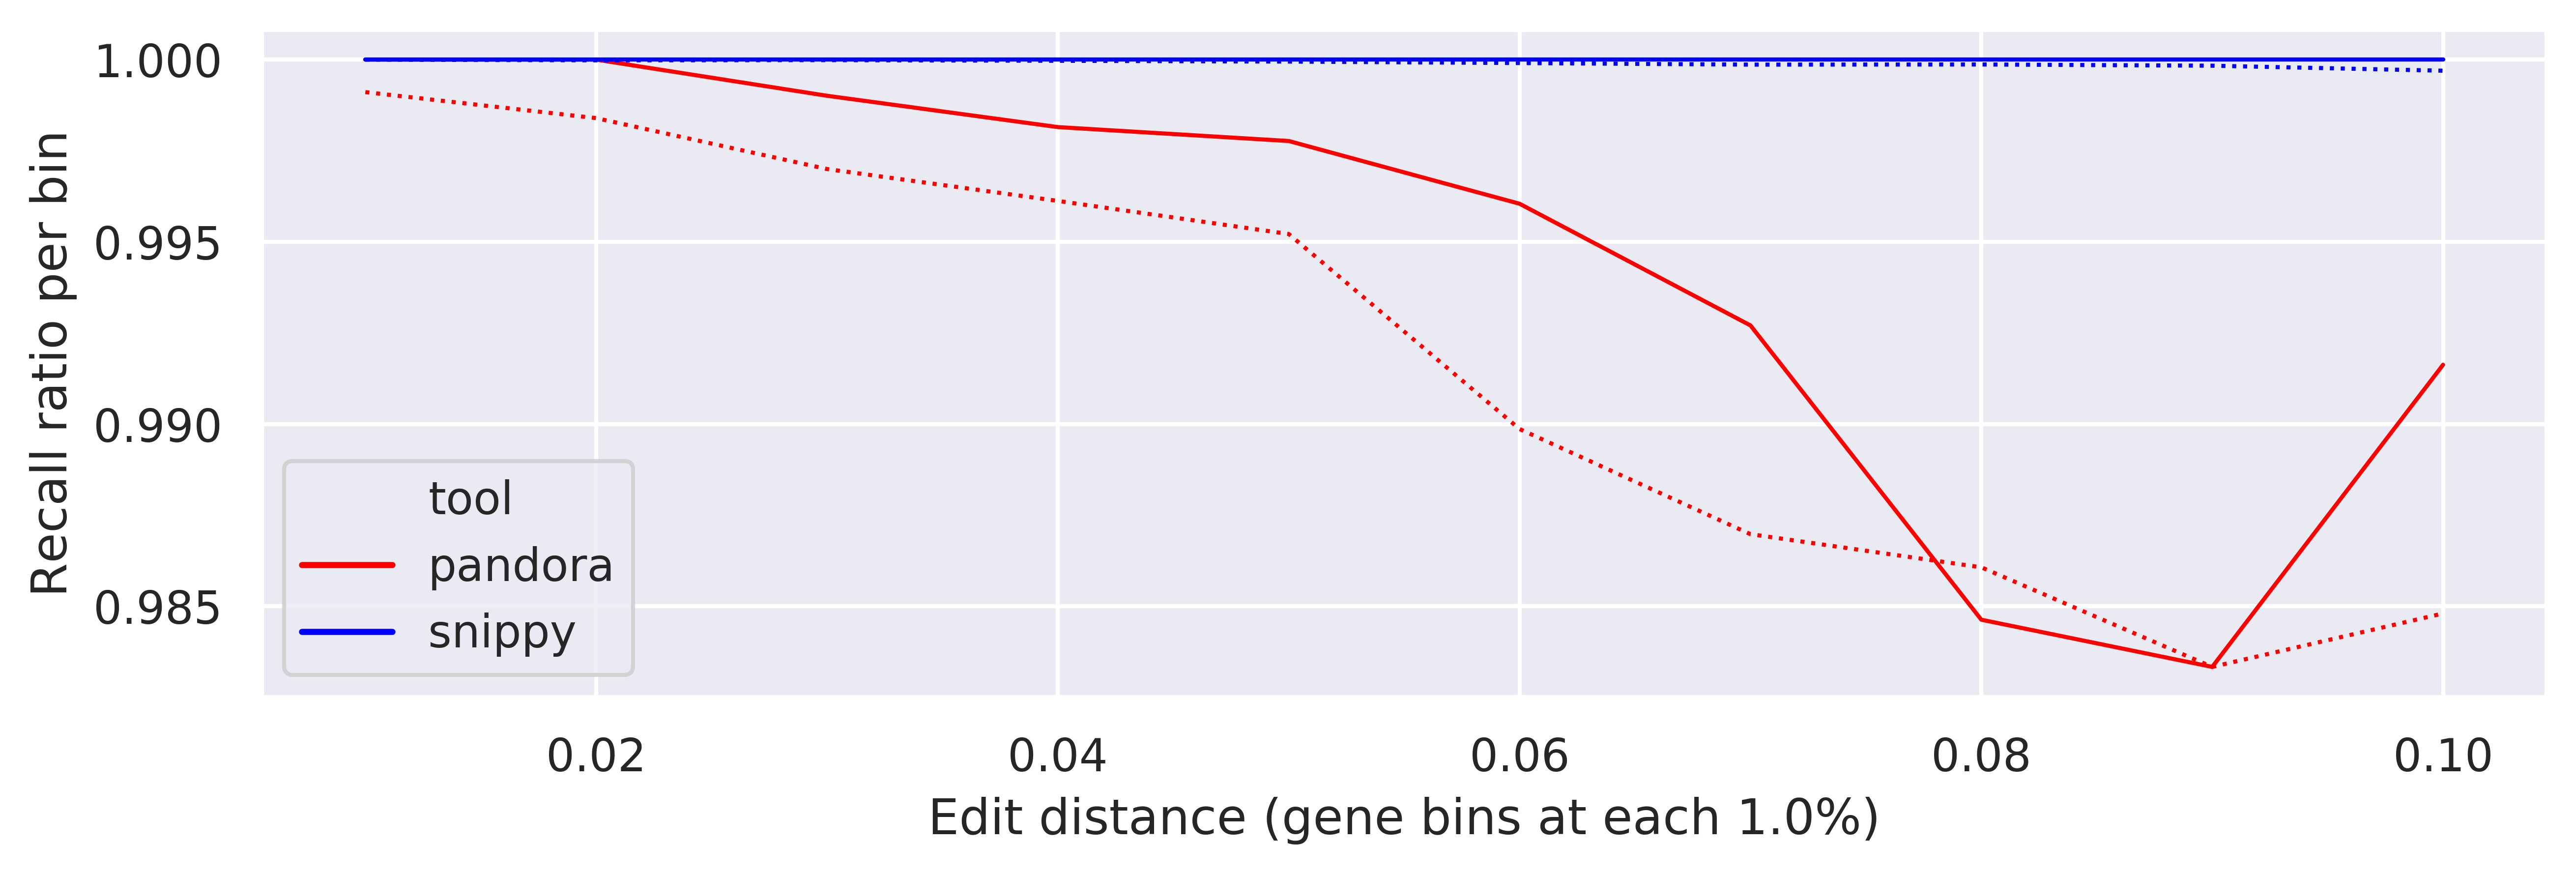

In [10]:
plot_line_for_precision_in_genes_in_several_bins(
    df_precision_with_step_001, step=0.01, 
    edit_distance_threshold = edit_distance_threshold_for_precision_where_all_tools_have_at_least_50_datapoints,
    display_plot=True)

## Number of datapoints (1 datapoint = (gene, truth, ref)) in each bin (log scale)

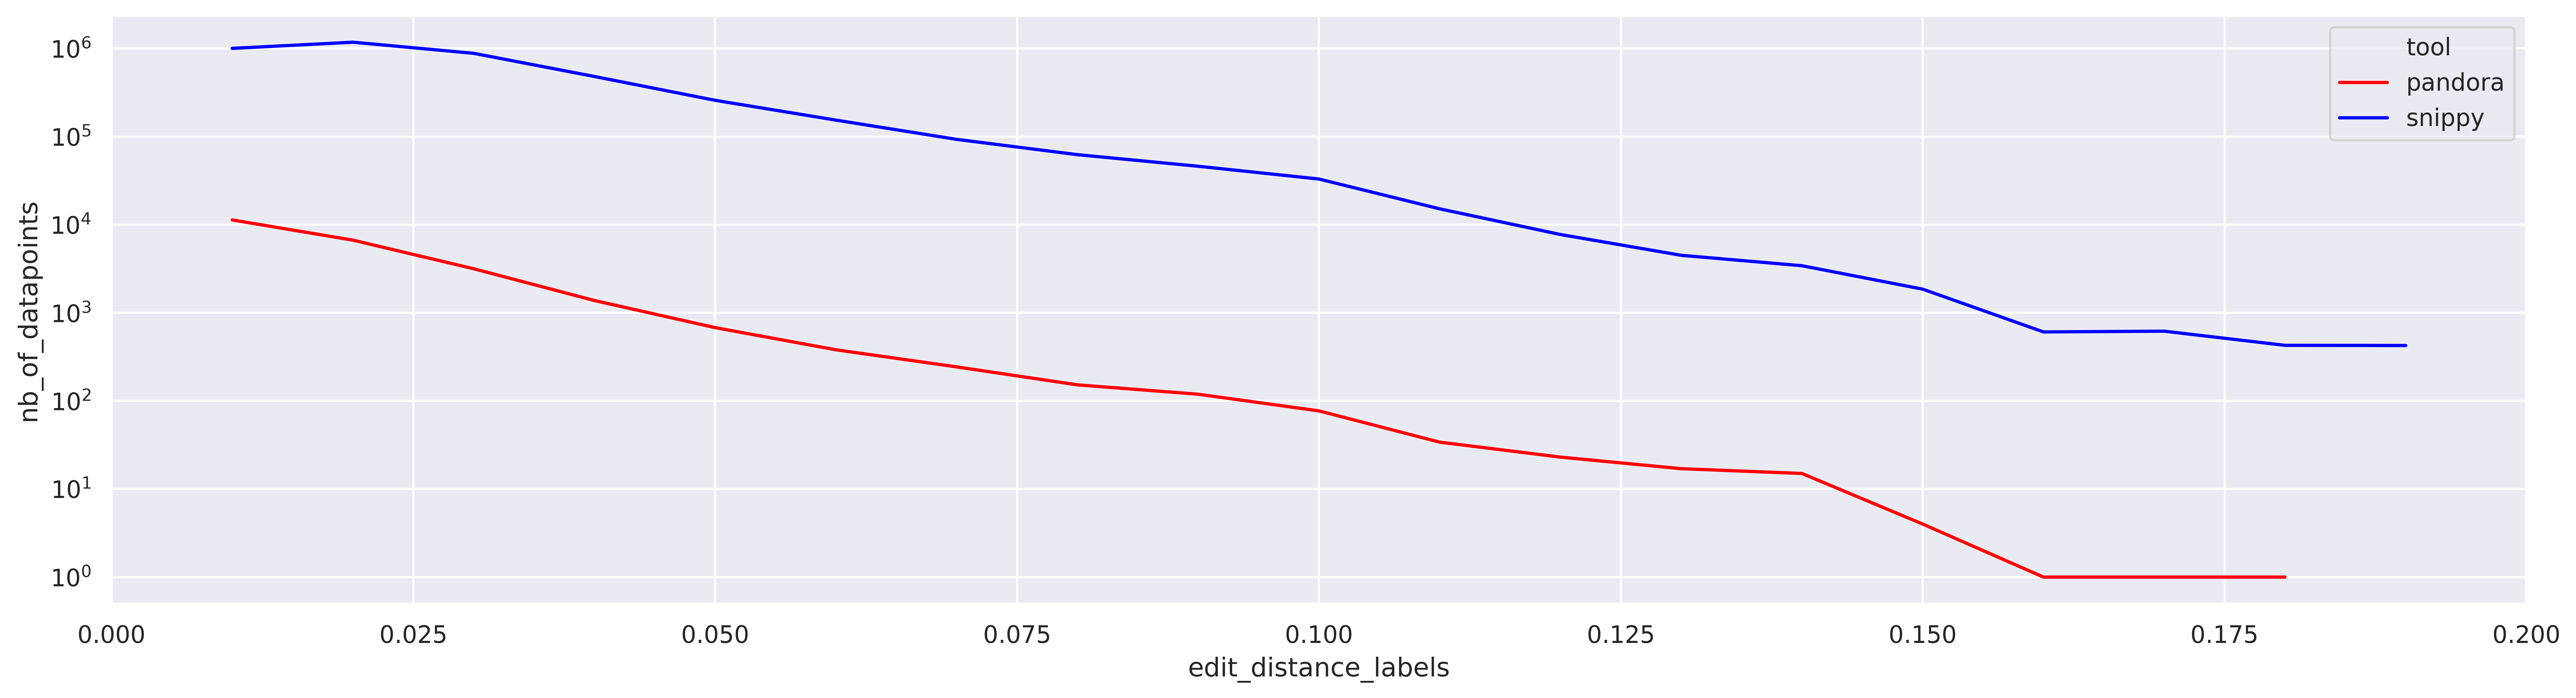

In [11]:
plot_lineplot_count_in_datapoints_in_several_bins(count_df_precision_with_step_001, step=0.01, display_plot=True)

# Debugging
### Just to check if things seem fine

### Common functions (skip)

In [12]:
import plotly.express as px

def get_df_grouped_by_triple_with_count(df):
    return df.groupby(by=["gene", "truth", "ref"]).count()[["tool"]].rename(columns={"tool": "nb_of_datapoints"})

def get_nb_of_genes_per_truth_and_ref(df_grouped_by_triple_with_count):
    nb_of_genes_per_truth_and_ref = df_grouped_by_triple_with_count.groupby(by=["truth", "ref"]).count().rename(columns = {"nb_of_datapoints": "nb_of_genes"})
    nb_of_genes_per_truth_and_ref.reset_index(inplace=True)
    return nb_of_genes_per_truth_and_ref

def plot_nb_of_genes_per_truth_and_ref(nb_of_genes_per_truth_and_ref):
    fig = px.violin(nb_of_genes_per_truth_and_ref, y="nb_of_genes", points="all", box=True, hover_data=["ref", "truth"])
    fig.show()

## Recall debugging

## Pandora recall debugging

### Raw data

In [13]:
df_pandora_recall

gene     truth                        ref  distance  \
0       Cluster_1009    CFT073  pandora_vcf_ref_no_denovo  0.002433   
1      Cluster_10094    CFT073  pandora_vcf_ref_no_denovo  0.098901   
2       Cluster_1011    CFT073  pandora_vcf_ref_no_denovo  0.012755   
3        Cluster_102    CFT073  pandora_vcf_ref_no_denovo  0.045767   
4      Cluster_10205    CFT073  pandora_vcf_ref_no_denovo  0.011236   
...              ...       ...                        ...       ...   
61418     GC00010497  063_STEC  pandora_vcf_ref_no_denovo  0.022876   
61419     GC00010787  063_STEC  pandora_vcf_ref_no_denovo  0.024096   
61420     GC00010867  063_STEC  pandora_vcf_ref_no_denovo  0.004630   
61421     GC00010870  063_STEC  pandora_vcf_ref_no_denovo  0.025253   
61422     GC00011088  063_STEC  pandora_vcf_ref_no_denovo  0.043478   

       max_recall  observed_recall  recall_ratio     tool  
0             7.0              6.0      0.857143  pandora  
1             5.0              3.0      0.600000  pandora  
2             3.0              3.0      1.000000  pandora  
3             5.0              3.0      0.600000  pandora  
4             1.0              0.0      0.000000  pandora  
...           ...              ...           ...      ...  
61418         9.0              0.0      0.000000  pandora  
61419         5.0              4.0      0.800000  pandora  
61420        18.0              0.0      0.000000  pandora  
61421         3.0              2.0      0.666667  pandora  
61422         7.0              0.0      0.000000  pandora  

[61423 rows x 8 columns]

In [14]:
df_pandora_recall_grouped_by_triple_with_count = get_df_grouped_by_triple_with_count(df_pandora_recall)
df_pandora_recall_grouped_by_triple_with_count

nb_of_datapoints
gene          truth      ref                                        
Cluster_10    CFT073     pandora_vcf_ref_no_denovo                 1
              ST38       pandora_vcf_ref_no_denovo                 1
Cluster_1001  CFT073     pandora_vcf_ref_no_denovo                 1
              H131800734 pandora_vcf_ref_no_denovo                 1
Cluster_10028 063_STEC   pandora_vcf_ref_no_denovo                 2
...                                                              ...
GC00010870    ST38       pandora_vcf_ref_no_denovo                 3
GC00011088    063_STEC   pandora_vcf_ref_no_denovo                 3
              CFT073     pandora_vcf_ref_no_denovo                 3
              H131800734 pandora_vcf_ref_no_denovo                 3
              ST38       pandora_vcf_ref_no_denovo                 3

[23600 rows x 1 columns]

### Nb of genes per (truth sample, ref) for Pandora:

In [15]:
nb_of_genes_per_truth_and_ref_for_pandora_for_recall = get_nb_of_genes_per_truth_and_ref(df_pandora_recall_grouped_by_triple_with_count)
nb_of_genes_per_truth_and_ref_for_pandora_for_recall

truth                        ref  nb_of_genes
0    063_STEC  pandora_vcf_ref_no_denovo         5775
1      CFT073  pandora_vcf_ref_no_denovo         6018
2  H131800734  pandora_vcf_ref_no_denovo         5656
3        ST38  pandora_vcf_ref_no_denovo         6151

In [16]:
plot_nb_of_genes_per_truth_and_ref(nb_of_genes_per_truth_and_ref_for_pandora_for_recall)


## Snippy recall debugging

### Raw data

In [17]:
df_snippy_recall

gene     truth            ref  distance  max_recall  \
0          Cluster_1009    CFT073  NZ_CP016182.1  0.007299         7.0   
1         Cluster_10094    CFT073  NZ_CP016182.1  0.109890         5.0   
2          Cluster_1011    CFT073  NZ_CP016182.1  0.045918         3.0   
3         Cluster_10205    CFT073  NZ_CP016182.1  0.011236         1.0   
4          Cluster_1023    CFT073  NZ_CP016182.1  0.062016        11.0   
...                 ...       ...            ...       ...         ...   
12364770     GC00010496  063_STEC     CP010140.1  0.030864        12.0   
12364771     GC00010497  063_STEC     CP010140.1  0.026144         9.0   
12364772     GC00010787  063_STEC     CP010140.1  0.020080         5.0   
12364773     GC00010870  063_STEC     CP010140.1  0.015152         3.0   
12364774     GC00011088  063_STEC     CP010140.1  0.043478         7.0   

          observed_recall  recall_ratio    tool  
0                     3.0      0.428571  snippy  
1                     5.0      1.000000  snippy  
2                     1.0      0.333333  snippy  
3                     1.0      1.000000  snippy  
4                     7.0      0.636364  snippy  
...                   ...           ...     ...  
12364770              8.0      0.666667  snippy  
12364771              6.0      0.666667  snippy  
12364772              5.0      1.000000  snippy  
12364773              3.0      1.000000  snippy  
12364774              7.0      1.000000  snippy  

[12364775 rows x 8 columns]

In [18]:
df_snippy_recall_grouped_by_triple_with_count = get_df_grouped_by_triple_with_count(df_snippy_recall)
df_snippy_recall_grouped_by_triple_with_count

nb_of_datapoints
gene       truth  ref                                
Cluster_10 CFT073 CP013185.1                        1
                  CP018239.1                        1
                  CP018245.1                        1
                  CP018247.1                        1
                  CP018250.1                        1
...                                               ...
GC00011088 ST38   NZ_LM993812.1                     3
                  NZ_LM995446.1                     3
                  NZ_LN832404.1                     3
                  NZ_LT632320.1                     3
                  NZ_MIPU01000001.1                 3

[4567667 rows x 1 columns]

### Nb of genes per (truth, ref) for Snippy:

In [19]:
nb_of_genes_per_truth_and_ref_for_snippy_for_recall = get_nb_of_genes_per_truth_and_ref(df_snippy_recall_grouped_by_triple_with_count)
nb_of_genes_per_truth_and_ref_for_snippy_for_recall

truth                ref  nb_of_genes
0    063_STEC         CP010116.1         4971
1    063_STEC         CP010117.1         5022
2    063_STEC         CP010121.1         5087
3    063_STEC         CP010122.1         5050
4    063_STEC         CP010125.1         5120
..        ...                ...          ...
899      ST38      NZ_LM993812.1         5264
900      ST38      NZ_LM995446.1         5289
901      ST38      NZ_LN832404.1         5356
902      ST38      NZ_LT632320.1         5337
903      ST38  NZ_MIPU01000001.1         5311

[904 rows x 3 columns]

In [20]:
plot_nb_of_genes_per_truth_and_ref(nb_of_genes_per_truth_and_ref_for_snippy_for_recall)


## Precision debugging

## Pandora precision debugging

### Raw data

In [21]:
df_pandora_precision

gene     truth                        ref  distance  \
0         Cluster_0    CFT073  pandora_vcf_ref_no_denovo  0.000000   
1        Cluster_10    CFT073  pandora_vcf_ref_no_denovo  0.002004   
2      Cluster_1001    CFT073  pandora_vcf_ref_no_denovo  0.065375   
3      Cluster_1007    CFT073  pandora_vcf_ref_no_denovo  0.000000   
4      Cluster_1009    CFT073  pandora_vcf_ref_no_denovo  0.002433   
...             ...       ...                        ...       ...   
24262    GC00009280  063_STEC  pandora_vcf_ref_no_denovo  0.013333   
24263    GC00009386  063_STEC  pandora_vcf_ref_no_denovo  0.090580   
24264    GC00009412  063_STEC  pandora_vcf_ref_no_denovo  0.091228   
24265    GC00009413  063_STEC  pandora_vcf_ref_no_denovo  0.005291   
24266    GC00009439  063_STEC  pandora_vcf_ref_no_denovo  0.015152   

       max_precision  observed_precision  precision_ratio     tool  
0                8.0            8.000000         1.000000  pandora  
1                3.0            3.000000         1.000000  pandora  
2               10.0            9.961538         0.996154  pandora  
3                1.0            1.000000         1.000000  pandora  
4               15.0           15.000000         1.000000  pandora  
...              ...                 ...              ...      ...  
24262            1.0            1.000000         1.000000  pandora  
24263            1.0            1.000000         1.000000  pandora  
24264            3.0            3.000000         1.000000  pandora  
24265            3.0            2.833333         0.944444  pandora  
24266            2.0            2.000000         1.000000  pandora  

[24267 rows x 8 columns]

In [22]:
df_pandora_precision_grouped_by_triple_with_count = get_df_grouped_by_triple_with_count(df_pandora_precision)
df_pandora_precision_grouped_by_triple_with_count

nb_of_datapoints
gene         truth  ref                                        
Cluster_0    CFT073 pandora_vcf_ref_no_denovo                 1
Cluster_1    ST38   pandora_vcf_ref_no_denovo                 1
Cluster_10   CFT073 pandora_vcf_ref_no_denovo                 1
             ST38   pandora_vcf_ref_no_denovo                 1
Cluster_1001 CFT073 pandora_vcf_ref_no_denovo                 1
...                                                         ...
GC00009561   ST38   pandora_vcf_ref_no_denovo                 1
GC00009562   ST38   pandora_vcf_ref_no_denovo                 1
GC00009564   ST38   pandora_vcf_ref_no_denovo                 1
GC00009565   ST38   pandora_vcf_ref_no_denovo                 1
GC00009574   ST38   pandora_vcf_ref_no_denovo                 1

[24267 rows x 1 columns]

### Nb of genes per (truth sample, ref) for Pandora:

In [23]:
nb_of_genes_per_truth_and_ref_for_pandora_for_precision = get_nb_of_genes_per_truth_and_ref(df_pandora_precision_grouped_by_triple_with_count)
nb_of_genes_per_truth_and_ref_for_pandora_for_precision

truth                        ref  nb_of_genes
0    063_STEC  pandora_vcf_ref_no_denovo         5841
1      CFT073  pandora_vcf_ref_no_denovo         6111
2  H131800734  pandora_vcf_ref_no_denovo         5557
3        ST38  pandora_vcf_ref_no_denovo         6758

In [24]:
plot_nb_of_genes_per_truth_and_ref(nb_of_genes_per_truth_and_ref_for_pandora_for_precision)


## Snippy precision debugging

### Raw data

In [25]:
df_snippy_precision

gene     truth            ref  distance  max_precision  \
0         Cluster_1001    CFT073  NZ_CP016182.1  0.067797           16.0   
1         Cluster_1009    CFT073  NZ_CP016182.1  0.007299            2.0   
2        Cluster_10093    CFT073  NZ_CP016182.1  0.021978            2.0   
3        Cluster_10094    CFT073  NZ_CP016182.1  0.109890            4.0   
4         Cluster_1011    CFT073  NZ_CP016182.1  0.045918            9.0   
...                ...       ...            ...       ...            ...   
4219951     GC00010497  063_STEC     CP010140.1  0.026144            8.0   
4219952     GC00010606  063_STEC     CP010140.1  0.067633            4.0   
4219953     GC00010787  063_STEC     CP010140.1  0.020080            4.0   
4219954     GC00010870  063_STEC     CP010140.1  0.015152            2.0   
4219955     GC00011088  063_STEC     CP010140.1  0.043478            6.0   

         observed_precision  precision_ratio    tool  
0                      16.0              1.0  snippy  
1                       2.0              1.0  snippy  
2                       2.0              1.0  snippy  
3                       4.0              1.0  snippy  
4                       9.0              1.0  snippy  
...                     ...              ...     ...  
4219951                 8.0              1.0  snippy  
4219952                 4.0              1.0  snippy  
4219953                 4.0              1.0  snippy  
4219954                 2.0              1.0  snippy  
4219955                 6.0              1.0  snippy  

[4219956 rows x 8 columns]

In [26]:
df_snippy_precision_grouped_by_triple_with_count = get_df_grouped_by_triple_with_count(df_snippy_precision)
df_snippy_precision_grouped_by_triple_with_count

nb_of_datapoints
gene       truth  ref                                
Cluster_0  CFT073 CP010116.1                        1
                  CP010122.1                        1
                  CP010137.1                        1
                  CP010151.1                        1
                  CP010231.1                        1
...                                               ...
GC00011088 ST38   NZ_LM993812.1                     1
                  NZ_LM995446.1                     1
                  NZ_LN832404.1                     1
                  NZ_LT632320.1                     1
                  NZ_MIPU01000001.1                 1

[4219956 rows x 1 columns]

### Nb of genes per (truth, ref) for Snippy:

In [27]:
nb_of_genes_per_truth_and_ref_for_snippy_for_precision = get_nb_of_genes_per_truth_and_ref(df_snippy_precision_grouped_by_triple_with_count)
nb_of_genes_per_truth_and_ref_for_snippy_for_precision

truth                ref  nb_of_genes
0    063_STEC         CP010116.1         4821
1    063_STEC         CP010117.1         4954
2    063_STEC         CP010121.1         5000
3    063_STEC         CP010122.1         4973
4    063_STEC         CP010125.1         5045
..        ...                ...          ...
899      ST38      NZ_LM993812.1         5047
900      ST38      NZ_LM995446.1         5074
901      ST38      NZ_LN832404.1         5125
902      ST38      NZ_LT632320.1         5123
903      ST38  NZ_MIPU01000001.1         5143

[904 rows x 3 columns]

In [28]:
plot_nb_of_genes_per_truth_and_ref(nb_of_genes_per_truth_and_ref_for_snippy_for_precision)
